In [ ]:
!pip install Tensorflow
!pip install --upgrade tensorflow
!pip install sklearn
!pip install pandas
!pip install --upgrade pandas 
!pip install keras
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [401]:
import warnings
warnings.simplefilter("ignore")
warnings.simplefilter("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore", category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
#from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [ ]:
stock_data=pd.read_csv('YESBANK.NS.csv')

In [707]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-02,20.850000,22.100000,20.750000,21.650000,21.650000,495265210
1,2023-01-03,21.900000,22.250000,21.750000,22.049999,22.049999,339801604
2,2023-01-04,22.200001,22.400000,20.900000,21.350000,21.350000,395137176
3,2023-01-05,21.500000,21.700001,21.150000,21.450001,21.450001,207055994
4,2023-01-06,21.600000,21.750000,20.950001,21.100000,21.100000,221378840
...,...,...,...,...,...,...,...
240,2023-12-22,21.250000,21.450001,20.799999,21.049999,21.049999,279614591
241,2023-12-26,21.150000,21.350000,20.850000,20.950001,20.950001,156456958
242,2023-12-27,21.100000,21.250000,20.850000,20.950001,20.950001,115159241
243,2023-12-28,21.000000,21.150000,20.799999,20.850000,20.850000,127826051


In [708]:
train_dates = pd.to_datetime((stock_data['Date']))

In [709]:
train_dates

0     2023-01-02
1     2023-01-03
2     2023-01-04
3     2023-01-05
4     2023-01-06
         ...    
240   2023-12-22
241   2023-12-26
242   2023-12-27
243   2023-12-28
244   2023-12-29
Name: Date, Length: 245, dtype: datetime64[ns]

In [710]:
col=stock_data.columns
col

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [718]:
train_data=stock_data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].astype(float)

In [719]:
lag_periods = [1, 7, 14]

# Create lag features
for lag_period in lag_periods:
    for column in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
        train_data['{column}_{lag_period}day_lag'] = train_data[column].shift(lag_period)

In [720]:
train_data['Open_close_interaction'] = train_data['Close'] * train_data['Open']
train_data['high_close_interaction'] = train_data['Close'] * train_data['High']
train_data['low_close_interaction'] = train_data['Close'] * train_data['Low']
train_data['Adj_Close_interaction'] = train_data['Close'] * train_data['Adj Close']
train_data['Volume_close_interaction'] = train_data['Close'] * train_data['Volume']

In [721]:
train_data

,Open,High,Low,Close,Adj Close,Volume,{column}_{lag_period}day_lag,Open_close_interaction,high_close_interaction,low_close_interaction,Adj_Close_interaction,Volume_close_interaction
0,20.850000,22.100000,20.750000,21.650000,21.650000,495265210.0,NaN,451.402500,478.465000,449.237500,468.722500,1.072249e+10
1,21.900000,22.250000,21.750000,22.049999,22.049999,339801604.0,NaN,482.894978,490.612478,479.587478,486.202456,7.492625e+09
2,22.200001,22.400000,20.900000,21.350000,21.350000,395137176.0,NaN,473.970021,478.240000,446.215000,455.822500,8.436179e+09
3,21.500000,21.700001,21.150000,21.450001,21.450001,207055994.0,NaN,461.175022,465.465043,453.667521,460.102543,4.441351e+09
4,21.600000,21.750000,20.950001,21.100000,21.100000,221378840.0,NaN,455.760000,458.925000,442.045021,445.210000,4.671094e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
240,21.250000,21.450001,20.799999,21.049999,21.049999,279614591.0,130093389.0,447.312479,451.522500,437.839958,443.102458,5.885887e+09
241,21.150000,21.350000,20.850000,20.950001,20.950001,156456958.0,152090824.0,443.092521,447.282521,436.807521,438.902542,3.277773e+09
242,21.100000,21.250000,20.850000,20.950001,20.950001,115159241.0,169448494.0,442.045021,445.187521,436.807521,438.902542,2.412586e+09
243,21.000000,21.150000,20.799999,20.850000,20.850000,127826051.0,300341296.0,437.850000,440.977500,433.679979,434.722500,2.665173e+09


In [723]:
train_data.isnull().sum()

Open                             0
High                             0
Low                              0
Close                            0
Adj Close                        0
Volume                           0
{column}_{lag_period}day_lag    14
Open_close_interaction           0
high_close_interaction           0
low_close_interaction            0
Adj_Close_interaction            0
Volume_close_interaction         0
dtype: int64

In [725]:
train_data.dropna(inplace=True)

In [726]:
train_data.isnull().sum()

Open                            0
High                            0
Low                             0
Close                           0
Adj Close                       0
Volume                          0
{column}_{lag_period}day_lag    0
Open_close_interaction          0
high_close_interaction          0
low_close_interaction           0
Adj_Close_interaction           0
Volume_close_interaction        0
dtype: int64

In [727]:
scaler=MinMaxScaler()
scaler=scaler.fit(train_data)
scaled_train_data=scaler.transform(train_data)

In [728]:
scaled_train_data

array([[0.67647059, 0.63522021, 0.6862746 , ..., 0.61873413, 0.57066777,
        0.15700671],
       [0.39411765, 0.44025163, 0.39869299, ..., 0.36088992, 0.37005737,
        0.5028312 ],
       [0.44705894, 0.42767301, 0.48366019, ..., 0.40678129, 0.37607018,
        0.1728155 ],
       ...,
       [0.78823529, 0.773585  , 0.84313737, ..., 0.79474896, 0.73224132,
        0.1449612 ],
       [0.77647059, 0.76100639, 0.83660129, ..., 0.78344983, 0.71841283,
        0.16013799],
       [0.76470588, 0.84276728, 0.82352965, ..., 0.82078816, 0.80237556,
        0.29171543]])

In [729]:
scaled_train_data = scaled_train_data[~np.isnan(scaled_train_data).any(axis=1)]

In [730]:
nulval=np.isnan(scaled_train_data).sum()

In [731]:
nulval

0

In [732]:
def timestep(data, time_steps):
    X = []
    y = []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)



In [733]:
X,y=timestep(scaled_train_data,5)

In [848]:
optimizer = Adam(learning_rate=0.1)
model=Sequential()
model.add(LSTM(64,activation="relu",input_shape=(X.shape[1],X.shape[2]),return_sequences=True))
model.add(LSTM(32,activation="relu",return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1]))

model.compile(optimizer=optimizer,loss='mean_squared_error')



In [849]:
history = model.fit(X,y,epochs=10)

Epoch 1/10
8/8 [==============================] - 4s 10ms/step - loss: 1365.6461
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.1040
Epoch 3/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0822
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0582
Epoch 5/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0550
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0650
Epoch 7/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0647
Epoch 8/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0658
Epoch 9/10
8/8 [==============================] - 0s 7ms/step - loss: 0.0497
Epoch 10/10
8/8 [==============================] - 0s 8ms/step - loss: 0.0769


In [850]:
day_in_future=29

In [851]:
forecast_dates = pd.date_range(list(train_dates)[-1], periods=day_in_future, freq='1d').strftime('%Y-%m-%d')

In [852]:
forecast_dates

Index(['2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01', '2024-01-02',
       '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-06', '2024-01-07',
       '2024-01-08', '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
       '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19', '2024-01-20', '2024-01-21', '2024-01-22',
       '2024-01-23', '2024-01-24', '2024-01-25', '2024-01-26'],
      dtype='object')

In [853]:
predicted=model.predict(X[-day_in_future:])

1/1 [==============================] - 1s 824ms/step


In [854]:
predicted

array([[0.6670713 , 0.6151954 , 0.3088559 , 0.5770571 , 0.629645  ,
        0.5626552 , 0.5495964 , 0.57034385, 0.55767083, 0.56890213,
        0.6353855 , 0.5354911 ],
       [0.7367628 , 0.6772432 , 0.32525766, 0.6325965 , 0.69508713,
        0.62097037, 0.60864675, 0.6287694 , 0.6219539 , 0.63494146,
        0.70462525, 0.59847474],
       [0.7022117 , 0.6443897 , 0.32111877, 0.60314775, 0.6614587 ,
        0.5897535 , 0.5745044 , 0.5971557 , 0.5887773 , 0.6020802 ,
        0.6661887 , 0.56592023],
       [0.557583  , 0.5190887 , 0.2805416 , 0.49107555, 0.5276124 ,
        0.4725    , 0.4599894 , 0.4802911 , 0.4575668 , 0.46525326,
        0.5292741 , 0.437395  ],
       [0.52489   , 0.49194527, 0.26887268, 0.4667661 , 0.4980172 ,
        0.447471  , 0.43695214, 0.4553744 , 0.42854822, 0.43431923,
        0.50074375, 0.40915313],
       [0.6645885 , 0.6251432 , 0.28540853, 0.58628094, 0.63420695,
        0.5737333 , 0.57563615, 0.5836443 , 0.5631123 , 0.5673543 ,
        0.6566627 ,

In [855]:
predicted= scaler.inverse_transform(predicted)[:,3:4]

In [856]:
predicted = predicted.flatten()

In [857]:
predicted

array([19.39531 , 19.8424  , 19.605337, 18.703157, 18.507465, 19.46956 ,
       19.27488 , 19.073086, 19.0517  , 19.220184, 18.928114, 18.765535,
       19.333843, 19.58694 , 19.416609, 19.496563, 19.548819, 21.000292,
       20.513784, 20.206959, 20.494562, 21.513405, 20.876266, 19.618635,
       19.564497, 20.197369, 19.901247, 19.713305, 19.817213],
      dtype=float32)

In [858]:
forecast_data=pd.DataFrame({'Date':forecast_dates,'Close':predicted})
forecast_data= forecast_data.drop(forecast_data.index[0])

In [859]:
forecast_data

,Date,Close
1,2023-12-30,19.842400
2,2023-12-31,19.605337
3,2024-01-01,18.703157
4,2024-01-02,18.507465
5,2024-01-03,19.469561
6,2024-01-04,19.274879
7,2024-01-05,19.073086
8,2024-01-06,19.051701
9,2024-01-07,19.220184
10,2024-01-08,18.928114


In [860]:
known_data=stock_data[['Date','Close']]
known_data

,Date,Close
0,2023-01-02,21.650000
1,2023-01-03,22.049999
2,2023-01-04,21.350000
3,2023-01-05,21.450001
4,2023-01-06,21.100000
...,...,...
240,2023-12-22,21.049999
241,2023-12-26,20.950001
242,2023-12-27,20.950001
243,2023-12-28,20.850000


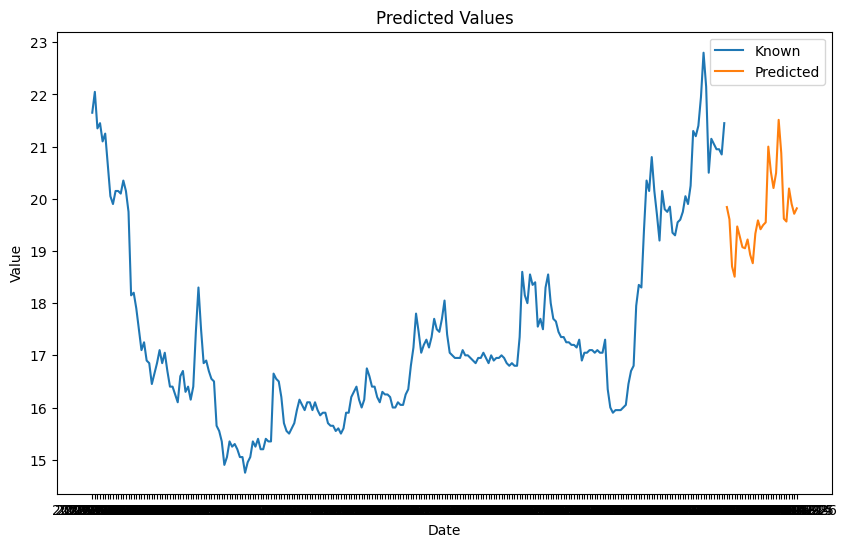

In [861]:
# Set the size of the figure
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches
plt.plot(known_data["Date"],known_data["Close"],label='Known')
# Plot predicted values
plt.plot(forecast_data['Date'], forecast_data['Close'], label='Predicted')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()


In [822]:
test_data=pd.read_csv('forecasting test.csv')

In [823]:
test_data=test_data[['Date','Close']]

In [824]:
test_data

,Date,Close
0,2024-01-01,22.650000
1,2024-01-02,23.200001
2,2024-01-03,22.900000
3,2024-01-04,23.250000
4,2024-01-05,24.000000
5,2024-01-08,24.200001
6,2024-01-09,24.200001
7,2024-01-10,25.500000
8,2024-01-11,25.549999
9,2024-01-12,24.900000


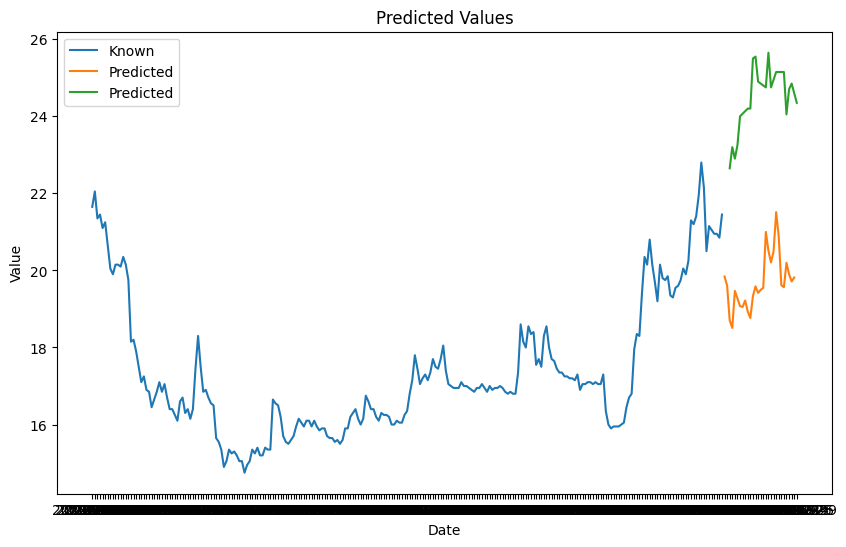

In [862]:
# Set the size of the figure
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches
plt.plot(known_data["Date"],known_data["Close"],label='Known')
# Plot predicted values
plt.plot(forecast_data['Date'], forecast_data['Close'], label='Predicted')
plt.plot(test_data['Date'], test_data['Close'], label='Predicted')
# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()


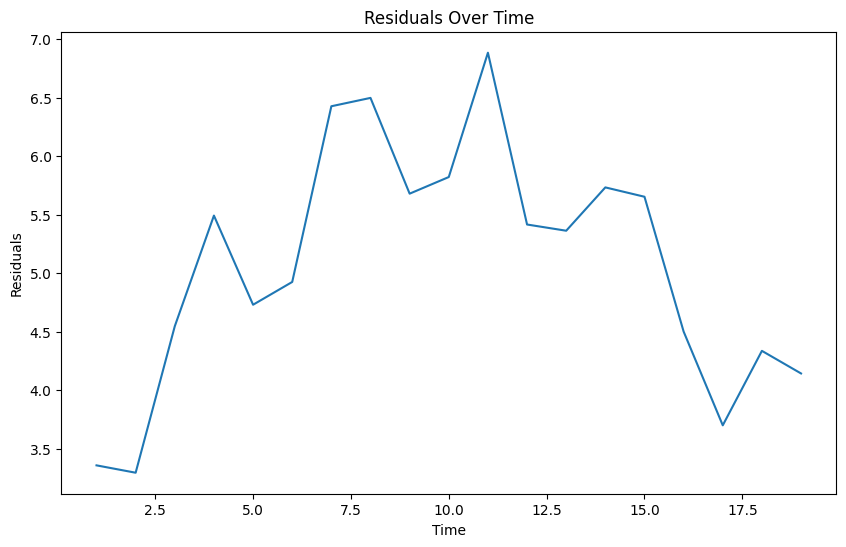

In [863]:
residuals = test_data["Close"] - forecast_data["Close"]

# Plot residuals over time
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals Over Time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

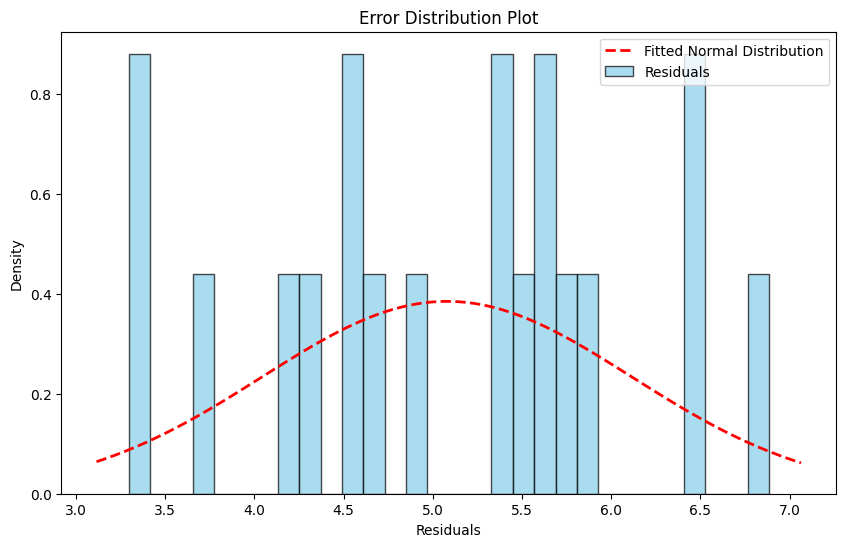

In [864]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming residuals is a pandas Series or array containing the residuals
residuals = test_data["Close"] - forecast_data["Close"]
residuals_mean = residuals.mean()
residuals_std = residuals.std()

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, density=True, color='skyblue', edgecolor='black', alpha=0.7)

# Plot fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, residuals_mean, residuals_std)
plt.plot(x, p, 'r--', linewidth=2)

# Add labels and title
plt.title('Error Distribution Plot')
plt.xlabel('Residuals')
plt.ylabel('Density')

# Add legend
plt.legend(['Fitted Normal Distribution', 'Residuals'])

# Show plot
plt.show()
